In [170]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
%matplotlib inline
import math
import copy


### data

In [26]:
X_train = np.array([[0.5, 1.5], 
                    [1,1], 
                    [1.5, 0.5], 
                    [3, 0.5], 
                    [2, 2], 
                    [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])

In [28]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)  #work with 1D or 1D y vectors
    neg = neg.reshape(-1,)

    # Plot examples
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

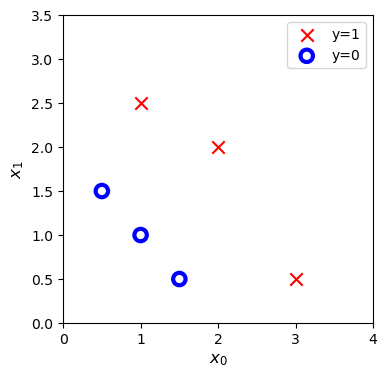

In [30]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

# Set both axes to be from 0-4
ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

## computing cost function
$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

  $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 

In [224]:
 
def compute_cost_logistic(X, y, w, b):

     m = X_train.shape[0]

     total_loss = 0
     total_cost = 0
    
     for i in range(m):
         z_i = np.dot(w, X[i]) + b
         f_x = 1 / (1 + np.exp(-z_i))    # sigmoid function
    
         total_loss += -y[i] * math.log(f_x) - (1 - y[i]) * math.log(1-f_x)
     
     total_cost = (total_loss )/m 
     return total_cost


In [172]:
w = np.array([1,1])
b = -3
print(compute_cost_logistic(X_train, y_train, w, b))

0.36686678640551745


## plot decision boundry

first boundry :  b = -3, w_0 = 1, w_1 = 1.    w = np.array([1,1])

1 x_0 + 1 x_1 -3 = 0        --->  x_1 = 3 - x_0

2nd boundry :    b = -4, w_0 = 1, w_1 = 1.    w = np.array([1,1])

1 x_0 + 1 x_1 -4 = 0        --->  x_1 = 4 - x_0

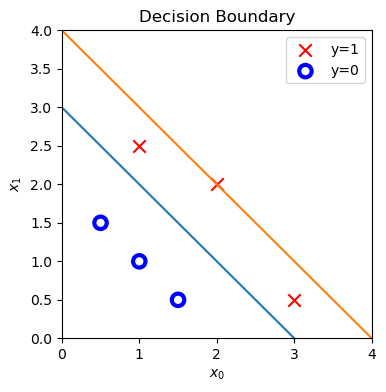

In [178]:

# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))

# Plot the decision boundary
ax.plot(x0,x1)   # first one
ax.plot(x0,x1_other)  # 2nd one 
ax.axis([0, 4, 0, 4])

# Plot the original data
plot_data(X_train,y_train,ax)
ax.axis([0, 4, 0, 4])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [180]:
w_1 = np.array([1,1])
b_1 = -3

w_2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461


## gradient 

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})  
\end{align*}$$

In [86]:
def compute_gradient_logistic(X, y, w, b): 

    m = X.shape[0]    #row
    n = X.shape[1]    #col

    #initialization
    dj_dw = np.zeros((n,))
    dj_db = 0

    for i in range(m): 
        z_i = np.dot(w, X[i]) + b
        f_x = 1 / (1 + np.exp(-z_i))    # sigmoid function
        error = f_x - y[i]

        dj_db +=  error
        
        for j in range(n):
            dj_dw[j] +=  error * X[i,j]
        
    dj_dw = dj_dw/m                                 
    dj_db = dj_db/m
    
    return dj_db, dj_dw 

In [88]:
X_tmp = np.array([[0.5, 1.5], 
                  [1,1], 
                  [1.5, 0.5], 
                  [3, 0.5], 
                  [2, 2], 
                  [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])

w_tmp = np.array([2.,3.])
b_tmp = 1.

dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)

print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [184]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    
    # An array to store cost J and w's at each iteration 
    J_history = []
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        
        # first Calculate the gradient 
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Then Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history


In [193]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, cost_hist = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


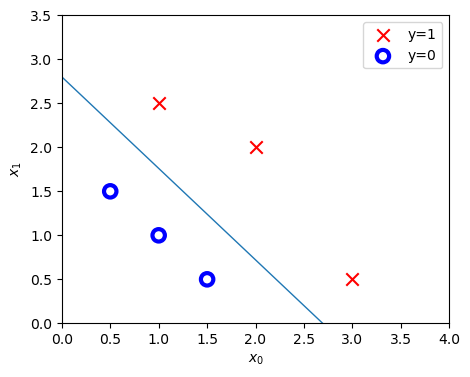

In [190]:
fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]    # x  intersect 
x1 = -b_out/w_out[1]    # y  intersect
ax.plot([0,x0],[x1,0], lw=1)
plt.show()


## Logistic Regression using Scikit-Learn

In [216]:
from sklearn.linear_model import LogisticRegression

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

logReg_model = LogisticRegression()
logReg_model.fit(X, y)     #fitting the data

LogisticRegression()

In [218]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


In [220]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0
